In [1]:
! pip install -U scikit-learn

In [2]:
!pip install -U delayed

In [3]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

In [4]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [5]:
class MyLinearRegression:
    
    def __init__(self, bias = True):
        self.bias = bias
        
    def fit(self, X, y):
        n, k = X.shape
        
        X_train = X
        if self.bias:
            X_train = np.hstack((X, np.ones((n,1))))
            
        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        
        return self
    
    def predict(self, X):
        n, k = X.shape
        
        if self.bias:
            X_train = np.hstack((X, np.ones((n,1))))
            
        y_pred = X_train @ self.w
        return y_pred
    
    def get_weights(self):
        return self.w
    

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
def linear_expression(x):
    return 7 * x + 7

In [8]:
n = 50
X = np.linspace(-10, 10, n)
y = linear_expression(X) + np.random.randn(n)*5

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)

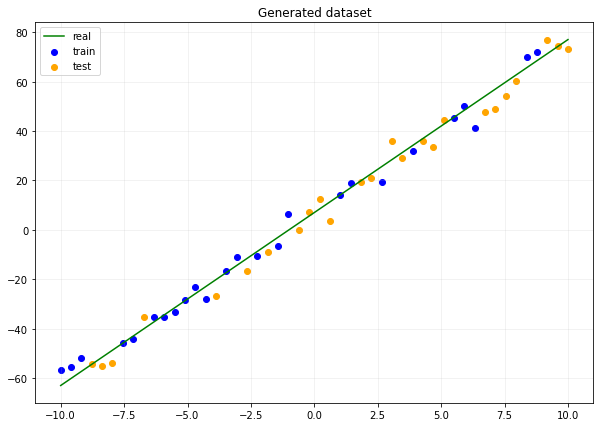

In [10]:
plt.figure(figsize=(10,7))
plt.plot(X,linear_expression(X), label='real', c = 'g')
plt.scatter(X_train, y_train, label = 'train', c = 'b')
plt.scatter(X_test, y_test, label = 'test', c = 'orange')

plt.title('Generated dataset')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [11]:
regressor = MyLinearRegression()

regressor.fit(X_train[:, np.newaxis], y_train)

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()
w

array([6.8230027 , 7.18341899])

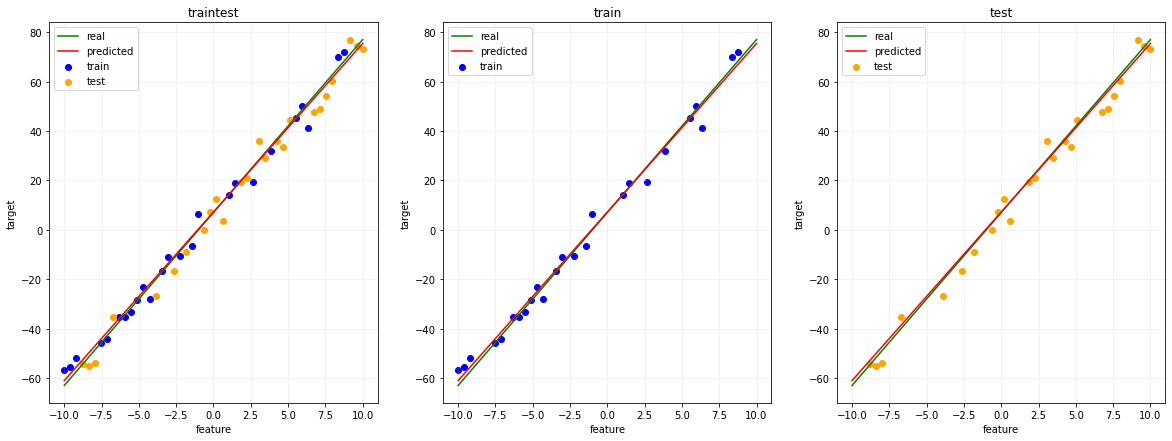

In [12]:
plt.figure(figsize = (20,7))

ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1,3, i+1, sharey = ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label = 'train', c = 'b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label = 'test', c = 'orange')
        
    plt.plot(X, linear_expression(X), label = 'real', c = 'g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label = 'predicted', c = 'r')
    
    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(''.join(types))
    plt.grid(alpha = 0.2)
    plt.legend()
    
plt.show()
    

In [13]:
# test with sklearn built-in fn

sklearn_regressor = LinearRegression()

sklearn_regressor.fit(X_train[:, np.newaxis], y_train)


LinearRegression()

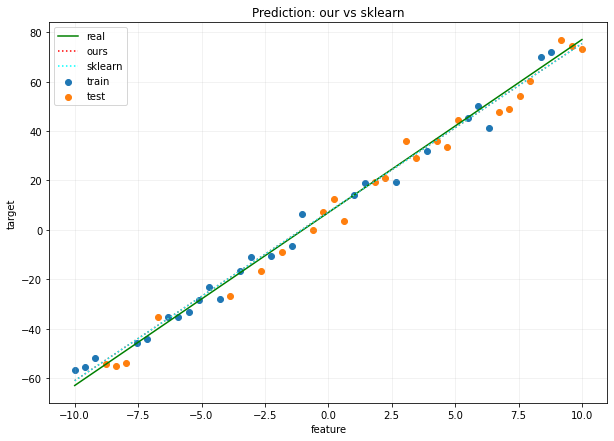

In [14]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='ours', c='r', linestyle=':')
plt.plot(X, sklearn_regressor.predict(X[:, np.newaxis]), label='sklearn', c='cyan', linestyle=':')

plt.title("Prediction: our vs sklearn")
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [15]:
# test results

from sklearn.metrics import mean_squared_error

train_predictions = regressor.predict(X_train[:, np.newaxis])
test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Train MSE:  14.396116509036052
Test MSE:  22.096801130998788
